In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [4]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [5]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [6]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

<H1>INSIGHTS</H1>

<h2 style="color:BLUE">1. What are the total Dengue cases per year?</h2>
<h3>2016 - 209,544 <br>
2017 - 154,155<br>
2018 - 250,783<br>
2019 - 441,902<br>
2020 - 91,041
</h3>

In [7]:
dengueperyear = dengue.groupby(['Year'])['Dengue_Cases'].sum().reset_index()
dengueperyear

,Year,Dengue_Cases
0,2016,209544
1,2017,154155
2,2018,250783
3,2019,441902
4,2020,91041


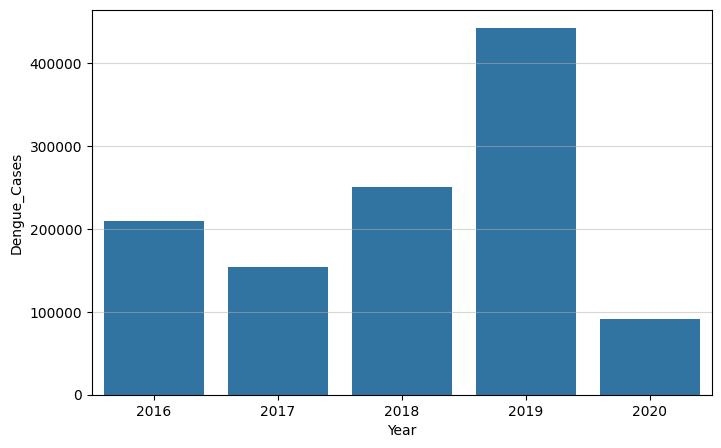

In [8]:
sns.barplot(data=dengueperyear, x="Year", y="Dengue_Cases")
plt.gcf().set_size_inches(8, 5)
plt.grid(axis='y', alpha=0.5)
plt.show()

<h2 style="color:BLUE">2. What month has the highest Dengue Case? (All Years)</h2>
<h3>Month of august has the highest Dengue Cases (All Years).
</h3>

In [9]:
denguemonth = dengue.groupby("Month")["Dengue_Cases"].sum().reset_index()
denguemonth

,Month,Dengue_Cases
0,January,84328
1,February,77801
2,March,57576
3,April,32508
4,May,32387
5,June,58110
6,July,138242
7,August,187554
8,September,177943
9,October,117645


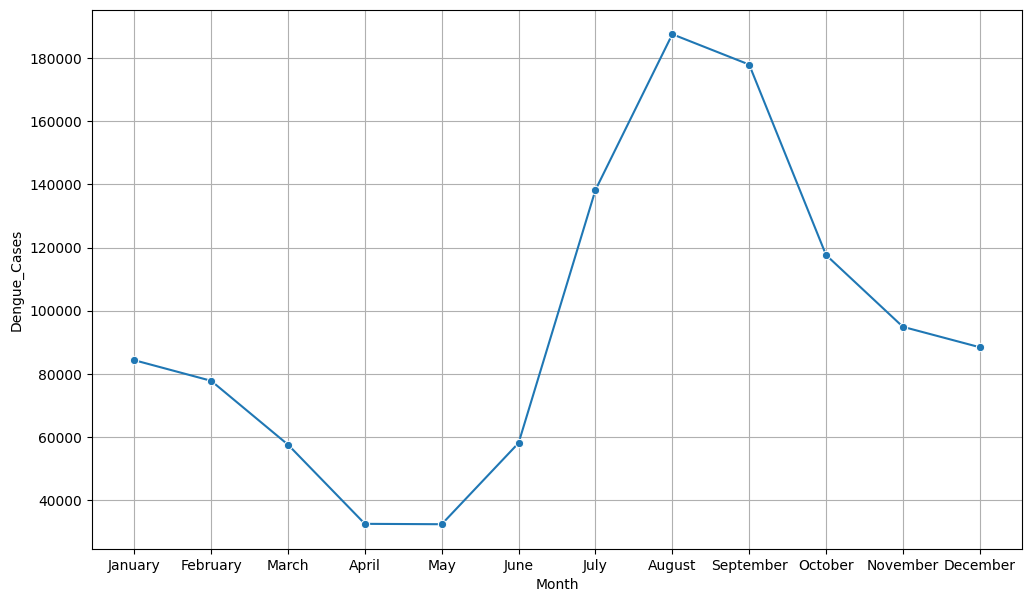

In [10]:
sns.lineplot(data=denguemonth, x="Month", y="Dengue_Cases", marker="o")
plt.grid(True)
plt.gcf().set_size_inches(12, 7)
plt.show()

<h2 style="color:BLUE">3. Correlation between Dengue Cases and Deaths</h2>
<h3>There is no strong positive correlation between Dengue Cases and Deaths, however this is a very weak positive correlation.</h3>

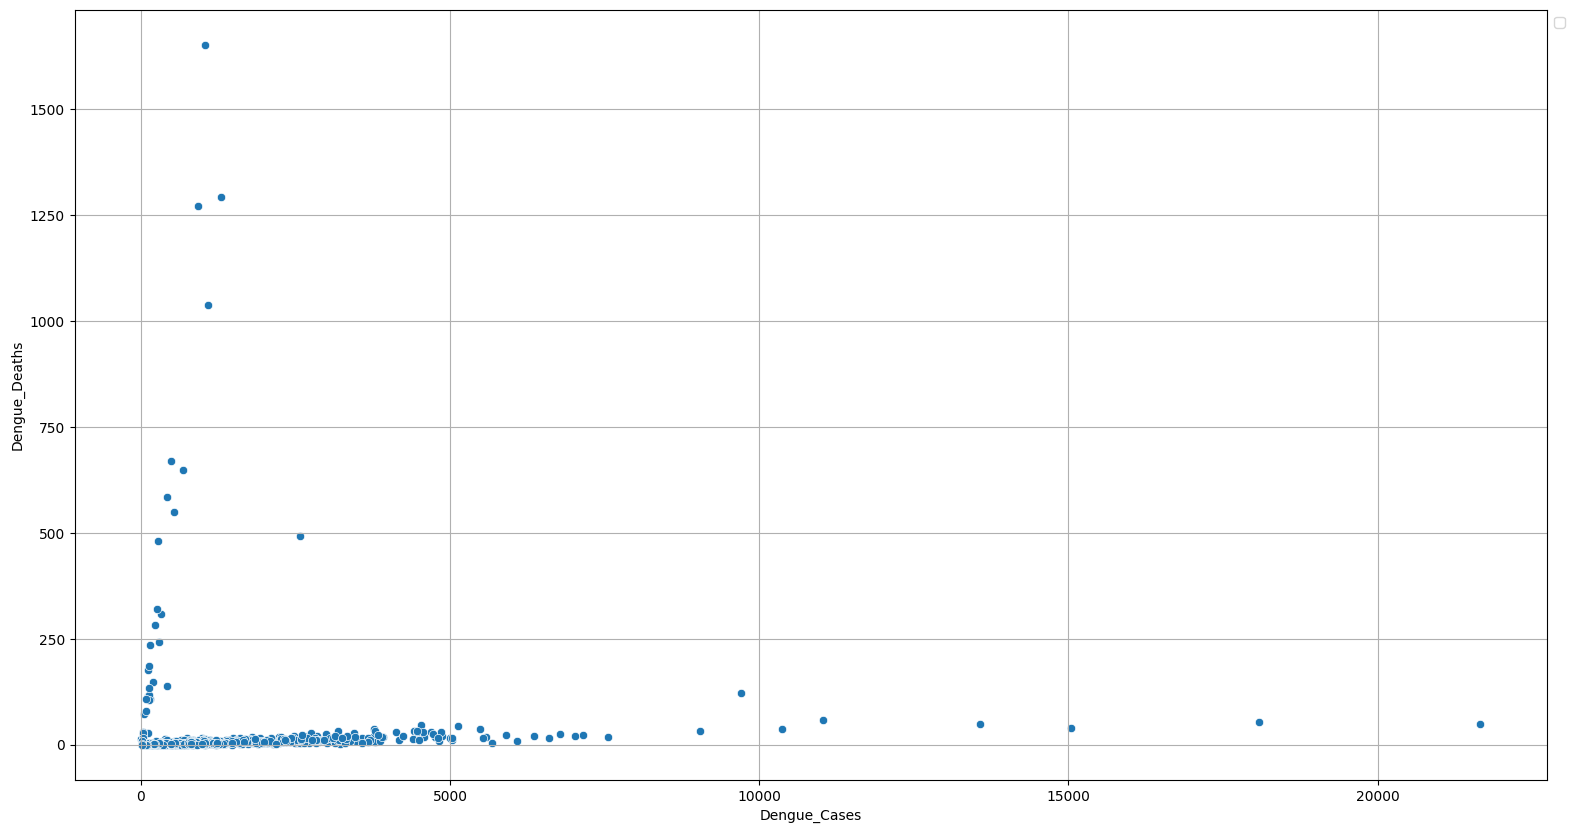

In [11]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

In [12]:
dengue["Dengue_Cases"].corr(dengue["Dengue_Deaths"])

np.float64(0.0383221372041949)

<h2 style="color:BLUE">4. What is the outlier in maximum dengue cases per year.</h2>
<h3>In year 2019, the maximum dengue case is 21,658</h3>

In [13]:
yearcases = dengue.groupby("Year")["Dengue_Cases"].max().reset_index()
yearcases

,Year,Dengue_Cases
0,2016,7155
1,2017,4764
2,2018,5581
3,2019,21658
4,2020,3464


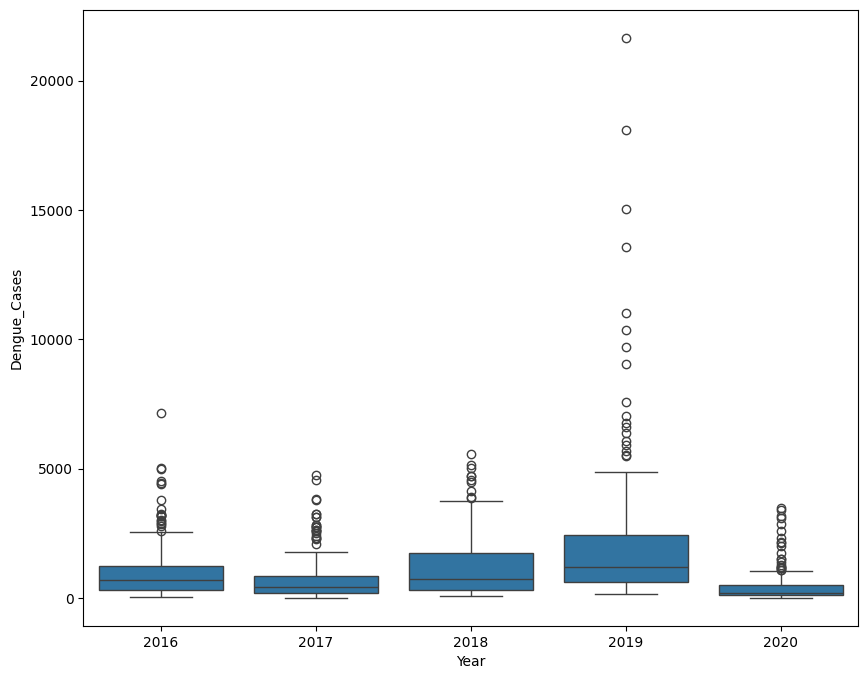

In [14]:
sns.boxplot(data=dengue, x="Year", y="Dengue_Cases")
plt.gcf().set_size_inches(10, 8)
plt.show()

<h2 style="color:BLUE">5. What is the total number of dengue deaths per year? </h2>
<h3>2016 - 8127 (48.2%)<br>
2017 - 4563 (27.1%)<br>
2018 - 1226 (7.3%)<br>
2019 - 1733 (10.3%)<br>
2020 - 1195 (7.1%)
</h3>

In [15]:
deathperyear = dengue.groupby("Year")["Dengue_Deaths"].sum().reset_index()
deathperyear

,Year,Dengue_Deaths
0,2016,8127
1,2017,4563
2,2018,1226
3,2019,1733
4,2020,1195


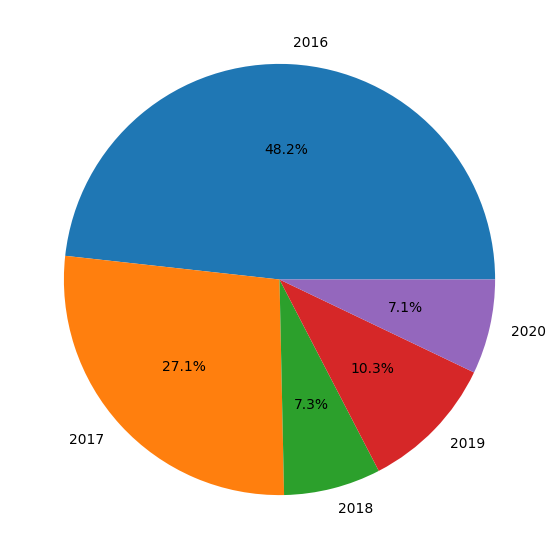

In [16]:
plt.pie(deathperyear['Dengue_Deaths'], labels=deathperyear['Year'], autopct='%1.1f%%')
plt.gcf().set_size_inches(10, 7)
plt.show()

<h2 style="color:BLUE">6. What are the 5 lowest monthly dengue case records?</h2>
<h3>May - 32,387<br>
April - 32,508<br>
March - 57,576<br>
June - 58,110<br>
February - 77,801
</h3>

In [17]:
monthdengcases = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=True).head(5)
monthdengcases

,Month,Dengue_Cases
4,May,32387
3,April,32508
2,March,57576
5,June,58110
1,February,77801


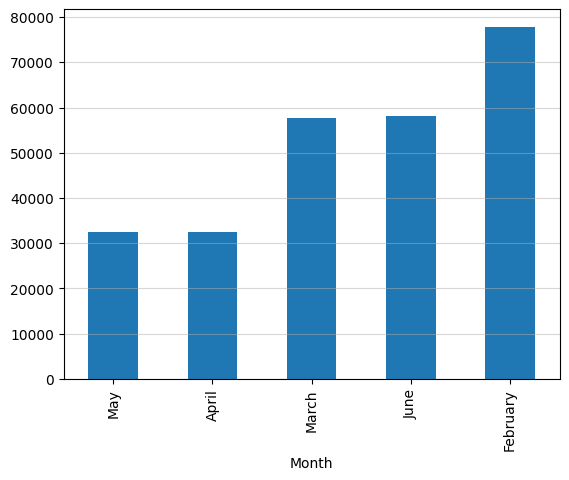

In [18]:
monthdengcases.plot(kind="bar", x='Month', y='Dengue_Cases', legend=False)
plt.grid(axis="y", alpha=0.5)
plt.show()

<h2 style="color:BLUE">7. What are the top 5 highest monthly dengue case records?</h2>
<h3>August - 187,554<br>
September - 177,943<br>
July - 138,242<br>
October - 117,645<br>
November - 94,900
</h3>

In [19]:
monthdengcases1 = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=False).head(5)
monthdengcases1

,Month,Dengue_Cases
7,August,187554
8,September,177943
6,July,138242
9,October,117645
10,November,94900


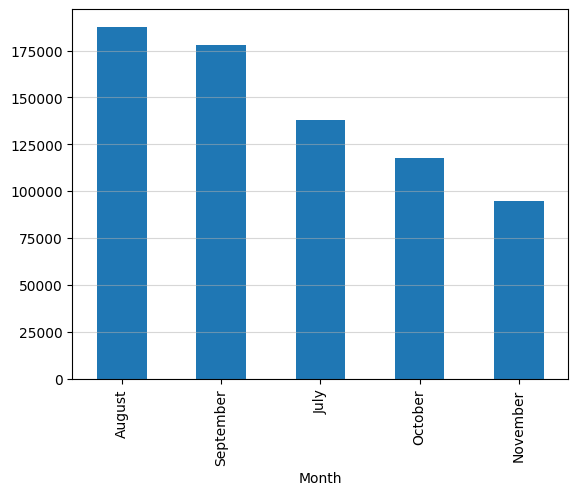

In [20]:
monthdengcases1.plot(kind="bar", x='Month', y='Dengue_Cases', legend=False)
plt.grid(axis="y", alpha=0.5)
plt.show()

<h2 style="color:BLUE">8. What are the top 5 regions that has the highest total dengue cases?</h2>
<h3>Region IV-A - 163,029<br>
Region III - 131,064<br>
Region VI - 117,523<br>
NCR - 115,966<br>
Region VII	 - 110,683
</h3>

In [21]:
regdengcases = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=False).head(5)
regdengcases

,Region,Dengue_Cases
6,Region IV-A,163029
5,Region III,131064
10,Region VI,117523
2,NCR,115966
11,Region VII,110683


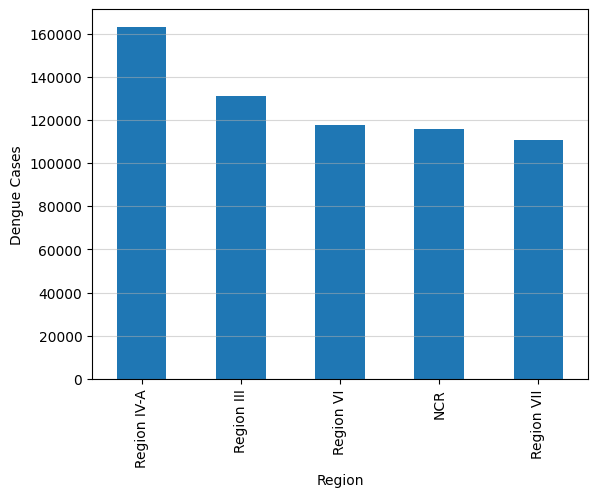

In [22]:
regdengcases.plot(kind="bar", x='Region', y='Dengue_Cases', legend=False)
plt.ylabel("Dengue Cases")
plt.grid(axis="y", alpha=0.5)
plt.show()

<h2 style="color:BLUE">9. What are the  5 regions that has the lowest total dengue cases?</h2>
<h3>BARMM - 11,537<br>
Region V - 22,167<br>
CAR - 30,582<br>
Region IV-B - 30,849<br>
Region XI - 32,522
</h3>

In [23]:
regdengcases1 = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=True).head(5)
regdengcases1

,Region,Dengue_Cases
0,BARMM,11537
9,Region V,22167
1,CAR,30582
7,Region IV-B,30849
14,Region XI,32522


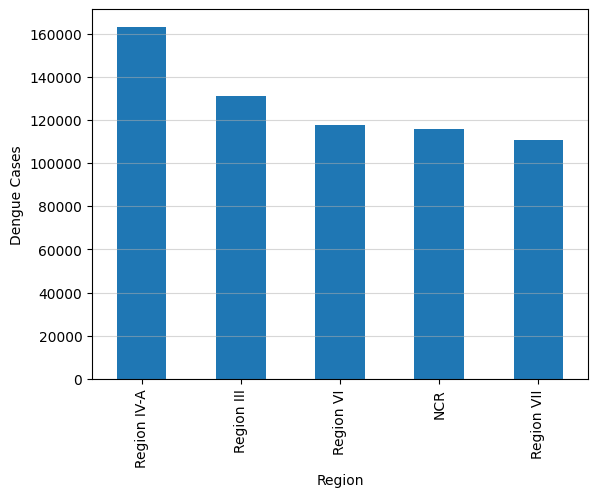

In [24]:
regdengcases.plot(kind="bar", x='Region', y='Dengue_Cases', legend=False)
plt.ylabel("Dengue Cases")
plt.grid(axis="y", alpha=0.5)
plt.show()

<h2 style="color:BLUE">10. Zero death records from 2016 to 2020.</h2>
<h3>2020 has the highest 0 deaths record.</h3>

In [25]:
zerodeath = dengue[dengue['Dengue_Deaths'] == 0]
zerodeath1 = zerodeath['Year'].value_counts().reset_index().sort_values(by="Year", ascending=True)
zerodeath1

,Year,count
2,2016,29
1,2017,40
3,2018,19
4,2019,15
0,2020,67


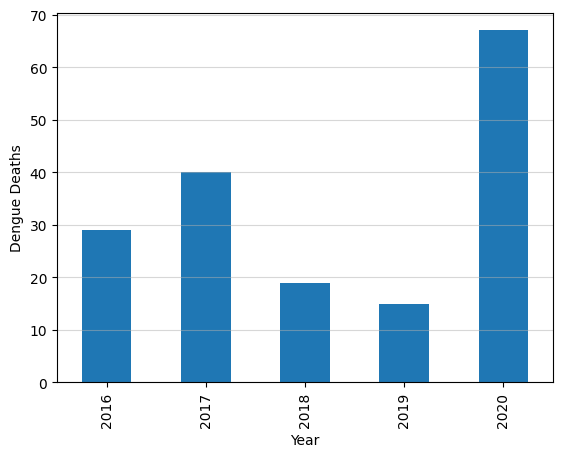

In [26]:
zerodeath1.plot(kind="bar",legend=False, x = 'Year', y="count")
plt.ylabel("Dengue Deaths")
plt.grid(axis='y', alpha=0.5)
plt.show()

<h2 style="color:BLUE">11.Dengue cases trend from 2016 to 2020</h2>
<h3></h3>

In [27]:
monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum().unstack()
monthly_cases

Year,2016,2017,2018,2019,2020
Month,,,,,
January,17052,15623,12657,20672,18324
February,12386,9872,10466,25494,19583
March,9300,7696,7944,19798,12838
April,7269,6343,6860,9252,2784
May,8092,4853,6594,10387,2461
June,10831,7589,11502,25523,2665
July,29744,18340,30363,55220,4575
August,36195,25039,34210,85038,7072
September,26990,17753,38617,89642,4941


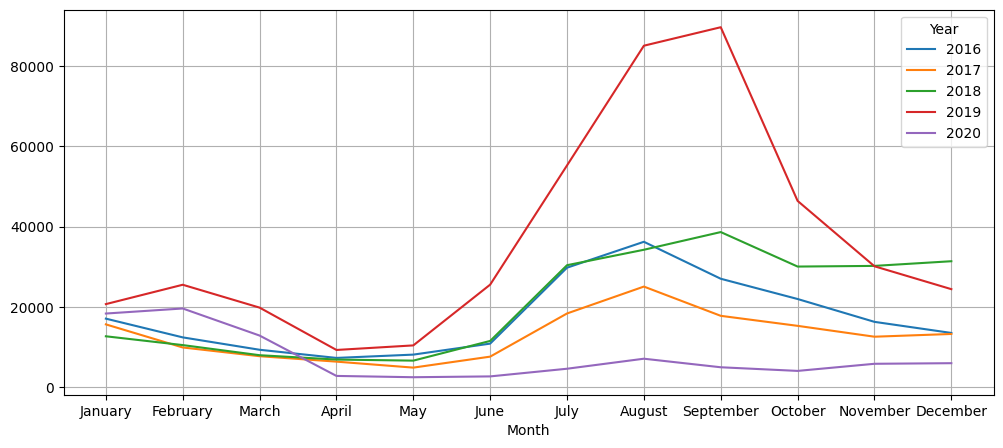

In [28]:
monthly_cases.plot(kind='line')
plt.gcf().set_size_inches(12,5)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h2 style="color:BLUE">12. What are the top 5 region with highest dengue cases in 2016 only.</h2>
<h3>Region VII	 - 29,395<br>
Region VI - 26,170<br>
Region IV-A - 24,282<br>
Region III - 20,989<br>
Region X - 17,680
</h3>

In [29]:
year2016 = dengue[dengue['Year'] == 2016]
year2016

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
967,August,2016,BARMM,327,2
968,September,2016,BARMM,124,105
969,October,2016,BARMM,82,109
970,November,2016,BARMM,143,1


In [30]:
regcases2016 = year2016.groupby(['Region'])['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=False).head(5)
regcases2016

,Region,Dengue_Cases
11,Region VII,29395
10,Region VI,26170
6,Region IV-A,24282
5,Region III,20989
13,Region X,17680


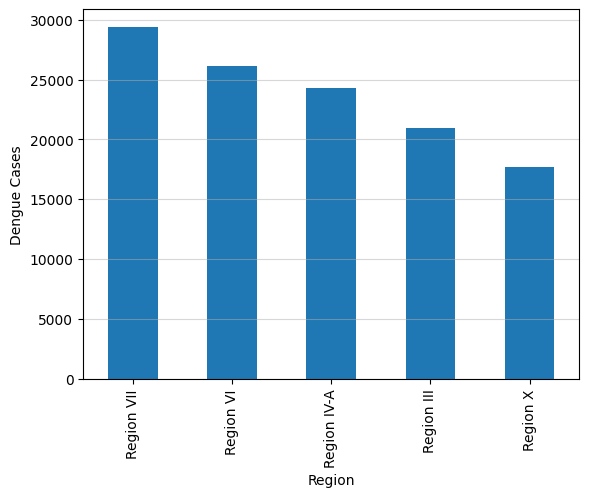

In [31]:
regcases2016.plot(kind="bar", legend=False, x="Region", y="Dengue_Cases")
plt.ylabel('Dengue Cases')
plt.grid(axis='y', alpha=0.5)
plt.show()

<h2 style="color:BLUE">13. What are the top 5 region with highest dengue cases in 2017 only.</h2>
<h3>NCR - 26,103<br>
Region III - 25,200<br>
Region IV-A - 22,421<br>
Region VII - 15,940<br>
Region XII - 9,613
</h3>

In [32]:
year2017 = dengue[dengue['Year'] == 2017]
regcases2017 = year2017.groupby(['Region'])['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=False).head(5)
regcases2017

,Region,Dengue_Cases
2,NCR,26103
5,Region III,25200
6,Region IV-A,22421
11,Region VII,15940
15,Region XII,9613


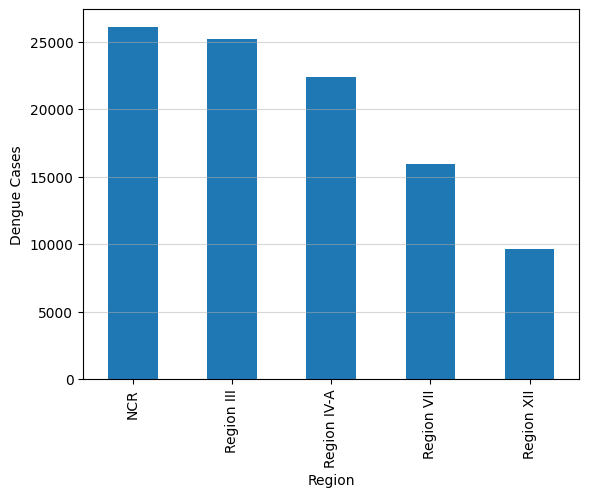

In [33]:
regcases2017.plot(kind="bar", legend=False, x="Region", y="Dengue_Cases")
plt.ylabel('Dengue Cases')
plt.grid(axis='y', alpha=0.5)
plt.show()

<h2 style="color:BLUE">14. What are the top 5 region with highest dengue cases in 2018 only.</h2>
<h3>Region III - 31,726<br>
Region IV-A - 30,410<br>
NCR - 29,200<br>
Region X - 23,497<br>
Region VII - 21,889
</h3>

In [34]:
year2018 = dengue[dengue['Year'] == 2018]
regcases2018 = year2018.groupby(['Region'])['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=False).head(5)
regcases2018

,Region,Dengue_Cases
5,Region III,31726
6,Region IV-A,30410
2,NCR,29200
13,Region X,23497
11,Region VII,21889


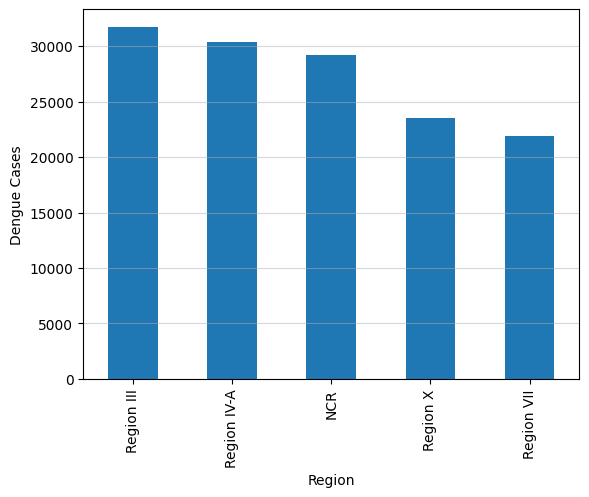

In [35]:
regcases2018.plot(kind="bar", legend=False, x="Region", y="Dengue_Cases")
plt.ylabel('Dengue Cases')
plt.grid(axis='y', alpha=0.5)
plt.show()

<h2 style="color:BLUE">15. What are the top 5 region with highest dengue cases in 2019 only.</h2>
<h3>Region IV-A - 76,195<br>
Region VI - 60,357<br>
NCR - 40,478<br>
Region III - 37,158<br>
Region VII - 31,053
</h3>

In [36]:
year2019 = dengue[dengue['Year'] == 2019]
regcases2019 = year2019.groupby(['Region'])['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=False).head(5)
regcases2019

,Region,Dengue_Cases
6,Region IV-A,76195
10,Region VI,60357
2,NCR,40478
5,Region III,37158
11,Region VII,31053


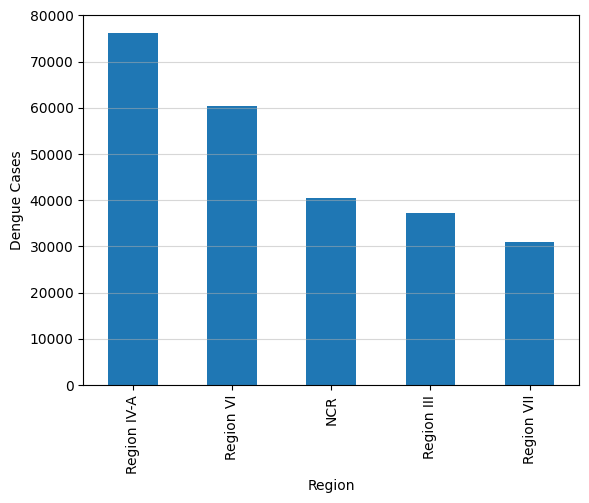

In [37]:
regcases2019.plot(kind="bar", legend=False, x="Region", y="Dengue_Cases")
plt.ylabel('Dengue Cases')
plt.grid(axis='y', alpha=0.5)
plt.show()

<h2 style="color:BLUE">16. What are the top 5 region with highest dengue cases in 2020 only.</h2>
<h3>Region III - 15,991<br>
Region VII - 12,406<br>
Region IV-A - 97,21<br>
NCR - 7,183<br>
Region I - 7,171
</h3>

In [38]:
year2020 = dengue[dengue['Year'] == 2020]
regcases2020 = year2020.groupby(['Region'])['Dengue_Cases'].sum().reset_index().sort_values(by="Dengue_Cases", ascending=False).head(5)
regcases2020

,Region,Dengue_Cases
5,Region III,15991
11,Region VII,12406
6,Region IV-A,9721
2,NCR,7183
3,Region I,7171


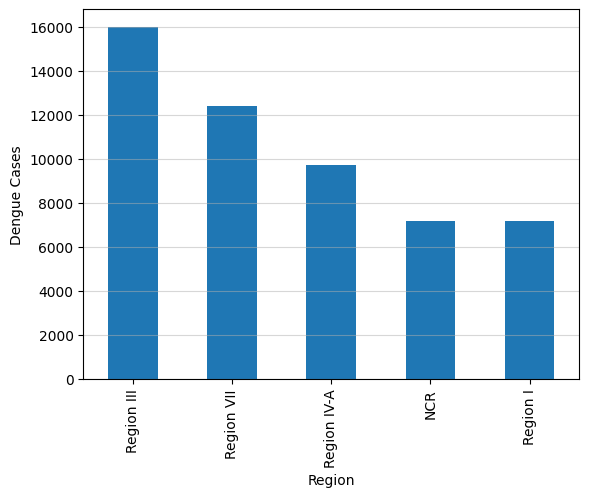

In [39]:
regcases2020.plot(kind="bar", legend=False, x="Region", y="Dengue_Cases")
plt.ylabel('Dengue Cases')
plt.grid(axis='y', alpha=0.5)
plt.show()

<h2 style="color:BLUE">17. Death cases on Luzon.</h2>
<h3>In CAR region has the highest death cases in Luzon region with 35.9%.
</h3>

In [40]:
dengue['Region'].value_counts()

Region
BARMM          60
CAR            60
NCR            60
Region I       60
Region II      60
Region III     60
Region IV-A    60
Region IV-B    60
Region IX      60
Region V       60
Region VI      60
Region VII     60
Region VIII    60
Region X       60
Region XI      60
Region XII     60
Region XIII    60
Name: count, dtype: int64

In [41]:
luzonregions = dengue[(dengue['Region'] == "CAR") | (dengue['Region'] == "Region I") | (dengue['Region'] == "Region II") | (dengue['Region'] == "Region III") | (dengue['Region'] == "Region IV-A") | (dengue['Region'] == "Region IV-B") | (dengue['Region'] == "Region V") | (dengue['Region'] == "Region NCR")]
luzonregions

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
955,August,2020,CAR,72,0
956,September,2020,CAR,39,26
957,October,2020,CAR,40,28
958,November,2020,CAR,38,15


In [42]:
deathluzon = luzonregions.groupby(['Region'])['Dengue_Deaths'].sum().reset_index()
deathluzondf = deathluzon[deathluzon['Dengue_Deaths'] != 0]
deathluzondf

,Region,Dengue_Deaths
1,CAR,1008
3,Region I,157
4,Region II,193
5,Region III,482
6,Region IV-A,652
7,Region IV-B,130
9,Region V,185


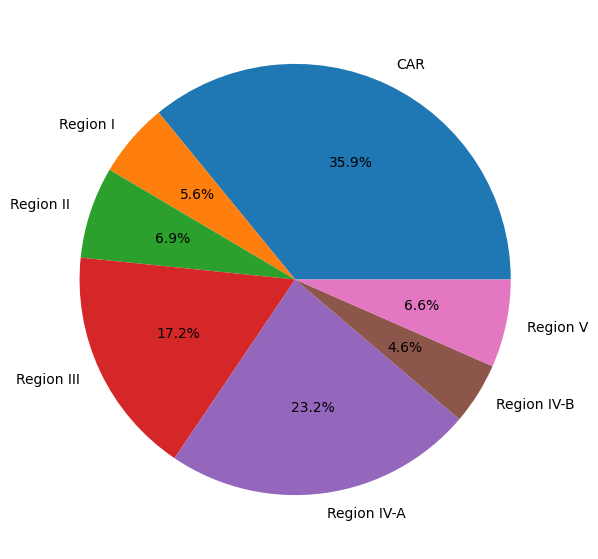

In [43]:
plt.pie(deathluzondf['Dengue_Deaths'], labels=deathluzondf['Region'], autopct='%1.1f%%')
plt.gcf().set_size_inches(10, 7)
plt.show()

<h2 style="color:BLUE">18. Death cases on Visayas.</h2>
<h3>In region VI has the highest death cases in Luzon region with 43.8%.
</h3>

In [56]:
visayasregions = dengue[(dengue['Region'] == "Region VI") | (dengue['Region'] == "Region VII") | (dengue['Region'] == "Region VIII")]
visayasregions

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
360,January,2016,Region VI,971,1
361,February,2016,Region VI,674,2
362,March,2016,Region VI,596,1
363,April,2016,Region VI,560,1
364,May,2016,Region VI,782,3
...,...,...,...,...,...
535,August,2020,Region VIII,138,0
536,September,2020,Region VIII,120,1
537,October,2020,Region VIII,95,0
538,November,2020,Region VIII,110,1


In [57]:
deathvisayas = visayasregions.groupby(['Region'])['Dengue_Deaths'].sum().reset_index()
deathvisayasdf = deathvisayas[deathvisayas['Dengue_Deaths'] != 0]
deathvisayasdf

,Region,Dengue_Deaths
10,Region VI,1825
11,Region VII,1760
12,Region VIII,585


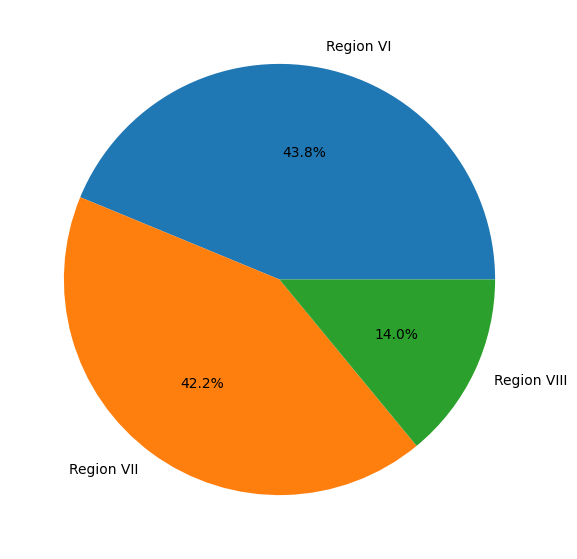

In [58]:
plt.pie(deathvisayasdf['Dengue_Deaths'], labels=deathvisayasdf['Region'], autopct='%1.1f%%')
plt.gcf().set_size_inches(10, 7)
plt.show()

<h2 style="color:BLUE">19. Death cases on Visayas.</h2>
<h3>In region XII has the highest death cases in Luzon region with 47.7%.
</h3>

In [46]:
mindanaoregions = dengue[(dengue['Region'] == "BARMM") | (dengue['Region'] == "Region IX") | (dengue['Region'] == "Region X") | (dengue['Region'] == "Region XI") | (dengue['Region'] == "Region XII") | (dengue['Region'] == "Region XIII")]
mindanaoregions

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
540,January,2016,Region IX,596,2
541,February,2016,Region IX,432,2
542,March,2016,Region IX,414,1
543,April,2016,Region IX,286,1
544,May,2016,Region IX,451,3
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [59]:
deathmindanao = mindanaoregions.groupby(['Region'])['Dengue_Deaths'].sum().reset_index()
deathmindanaodf = deathmindanao[deathmindanao['Dengue_Deaths'] != 0]
deathmindanaodf

,Region,Dengue_Deaths
0,BARMM,332
8,Region IX,532
13,Region X,848
14,Region XI,385
15,Region XII,2796
16,Region XIII,966


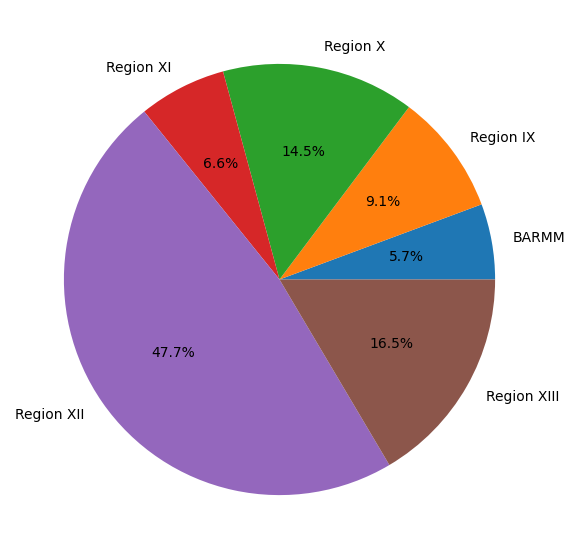

In [60]:
plt.pie(deathmindanaodf['Dengue_Deaths'], labels=deathmindanaodf['Region'], autopct='%1.1f%%')
plt.gcf().set_size_inches(10, 7)
plt.show()

<h2 style="color:BLUE">20. Dengue cases in our region (Region - IV-A) base on month per year.</h2>
<h3>September has the highest dengue cases that happened in September 2019 with 21,658.
</h3>

In [61]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [65]:
df = dengue[dengue['Region'] == "Region IV-A"]
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
180,January,2016,Region IV-A,2993,14
181,February,2016,Region IV-A,2035,5
182,March,2016,Region IV-A,1327,9
183,April,2016,Region IV-A,838,1
184,May,2016,Region IV-A,714,1
185,June,2016,Region IV-A,778,4
186,July,2016,Region IV-A,2270,6
187,August,2016,Region IV-A,3218,2
188,September,2016,Region IV-A,3454,28
189,October,2016,Region IV-A,3175,20


In [68]:
caseregion4 = df.groupby(['Year','Month'])['Dengue_Cases'].sum().unstack()
caseregion4

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,2993,2035,1327,838,714,778,2270,3218,3454,3175,2023,1457
2017,1764,1243,927,647,435,815,2727,3121,2520,2759,2635,2828
2018,2457,1975,1494,946,675,991,2793,3756,4697,3914,3575,3137
2019,2157,3252,2252,892,909,2531,6365,15047,21658,10365,5899,4868
2020,3175,2581,1504,151,77,105,212,291,231,325,542,527


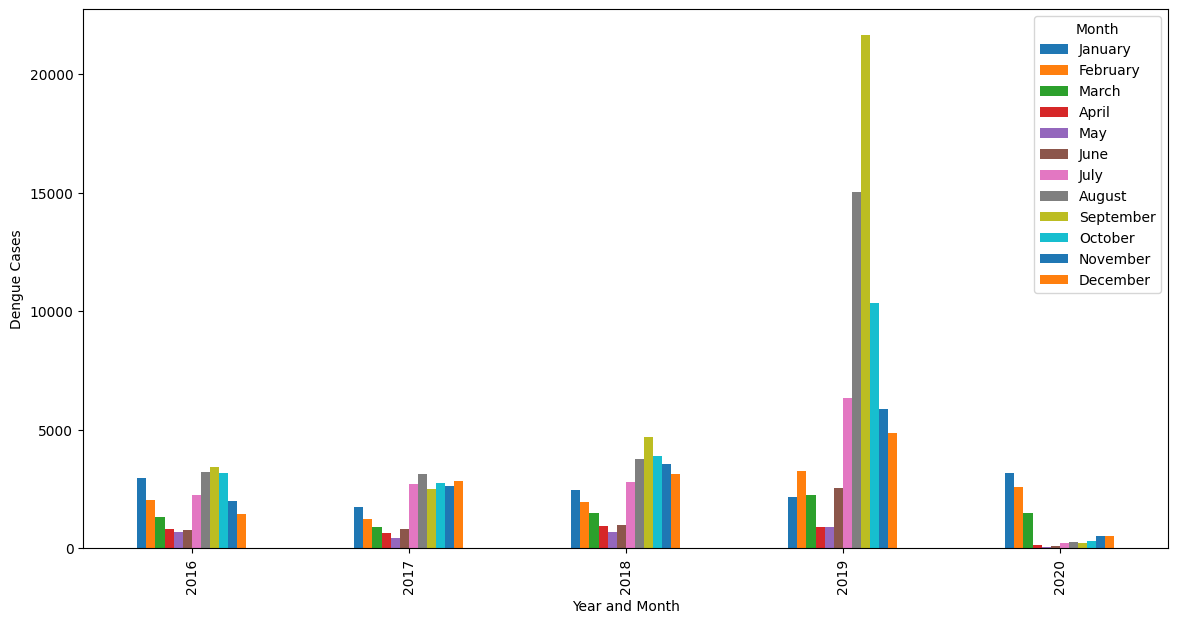

In [75]:
caseregion4.plot(kind="bar")
plt.gcf().set_size_inches(14,7)
plt.ylabel('Dengue Cases')
plt.xlabel('Year and Month')
plt.show()